In [2]:
import pandas as pd
import numpy as np


In [3]:
!pip install pandas openpyxl


In [4]:
!pip install tabulate

In [5]:
df = pd.read_excel("D:\IPO_Dataset.xlsx")

In [6]:
df.head()

,Date,IPO Name,Sector,Issue Size,QIB,HNI,RII,Total,Issue,Listing Open,Listing Close,Listing Gains %,CMP,Current Gains %
0,2023-05-09,Mankind Pharma,Healthcare,4326.36,22.72,1.47,0.44,7.02,1080,1300.00,1424.05,31.86,1326.80,22.85
1,2023-04-18,Avalon Technolo,Capaital Goods,865.00,2.27,0.16,0.46,1.36,436,431.00,397.45,-8.84,429.00,-1.61
2,2023-04-03,Udayshivakumar,Construction,66.00,28.94,27.06,6.70,15.03,35,30.71,33.39,-4.60,29.50,-15.71
3,2023-03-14,Divgi Torqtrans,Automobile & Ancillaries,412.12,2.47,0.62,2.21,1.92,590,600.00,605.15,2.57,827.65,40.28
4,2023-01-04,Radiant Cash,Financial Services,387.94,0.05,0.04,0.11,0.08,99,106.00,104.70,5.76,96.50,-2.53


In [7]:
print(df.isnull().sum())


Date               0
IPO Name           0
Sector             0
Issue Size         0
QIB                0
HNI                0
RII                0
Total              0
Issue              0
Listing Open       0
Listing Close      0
Listing Gains %    0
CMP                0
Current Gains %    2
dtype: int64


In [8]:
print(df.duplicated().sum())


0


In [9]:
print(df.columns)


Index(['Date ', 'IPO Name ', 'Sector ', 'Issue Size', 'QIB ', 'HNI ', 'RII ',
       'Total ', 'Issue', 'Listing Open', 'Listing Close', 'Listing Gains %',
       'CMP', 'Current Gains %'],
      dtype='object')


In [10]:
# Set the 'Date' column as the index
#df.reset_index('Date', inplace=True)

In [11]:
df.columns = df.columns.str.strip()


In [12]:
print(df.columns)

Index(['Date', 'IPO Name', 'Sector', 'Issue Size', 'QIB', 'HNI', 'RII',
       'Total', 'Issue', 'Listing Open', 'Listing Close', 'Listing Gains %',
       'CMP', 'Current Gains %'],
      dtype='object')


In [13]:
df['Date'] = pd.to_datetime(df['Date'])


In [14]:
from tabulate import tabulate
df['Year'] = df['Date'].dt.year
yearwise_ipos = df['Year'].value_counts().sort_index()

# Convert series to dataframe
yearwise_ipos_df = yearwise_ipos.reset_index()
yearwise_ipos_df.columns = ['Year', 'Number of IPOs']

print(tabulate(yearwise_ipos_df, headers='keys', tablefmt='psql'))




+----+--------+------------------+
|    |   Year |   Number of IPOs |
|----+--------+------------------|
|  0 |   2010 |               60 |
|  1 |   2011 |               35 |
|  2 |   2012 |               11 |
|  3 |   2013 |                2 |
|  4 |   2014 |                5 |
|  5 |   2015 |               20 |
|  6 |   2016 |               25 |
|  7 |   2017 |               35 |
|  8 |   2018 |               17 |
|  9 |   2019 |               13 |
| 10 |   2020 |               13 |
| 11 |   2021 |               63 |
| 12 |   2022 |               32 |
| 13 |   2023 |                5 |
+----+--------+------------------+


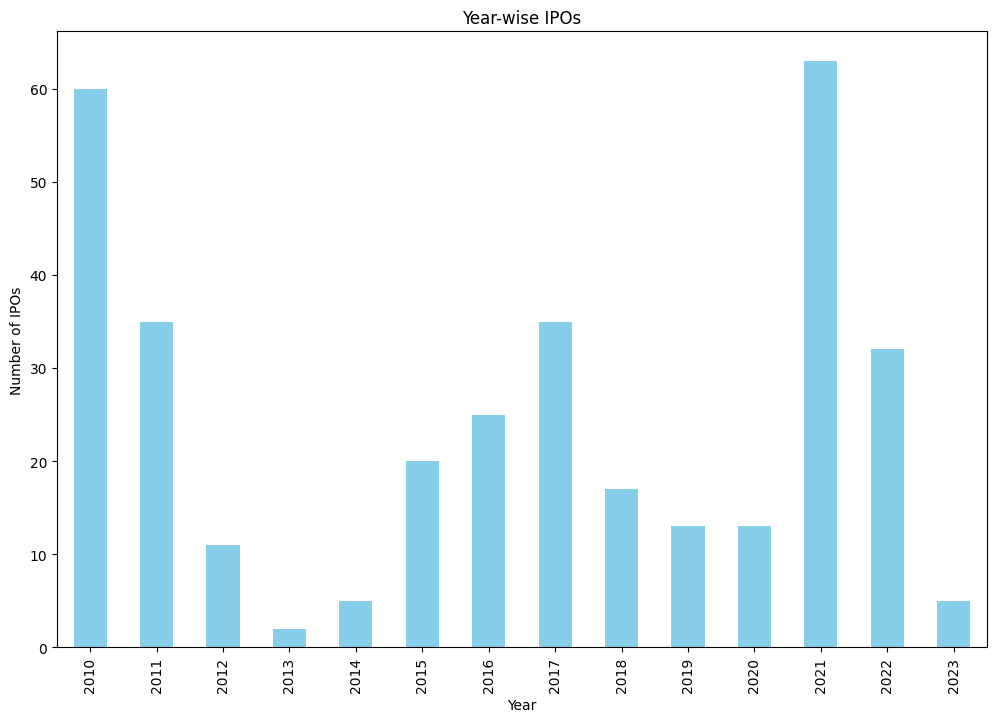

In [15]:
import matplotlib.pyplot as plt

# Assuming your existing code
df['Year'] = df['Date'].dt.year
yearwise_ipos = df['Year'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(12, 8))  # Create a new figure with specified size
yearwise_ipos.plot(kind='bar', color='skyblue')  # Plot a bar chart

plt.title('Year-wise IPOs')  # Set the title of the chart
plt.xlabel('Year')  # Set the label of the x-axis
plt.ylabel('Number of IPOs')  # Set the label of the y-axis

plt.show()  # Display the plot


In [16]:
print(yearwise_ipos)

2010    60
2011    35
2012    11
2013     2
2014     5
2015    20
2016    25
2017    35
2018    17
2019    13
2020    13
2021    63
2022    32
2023     5
Name: Year, dtype: int64


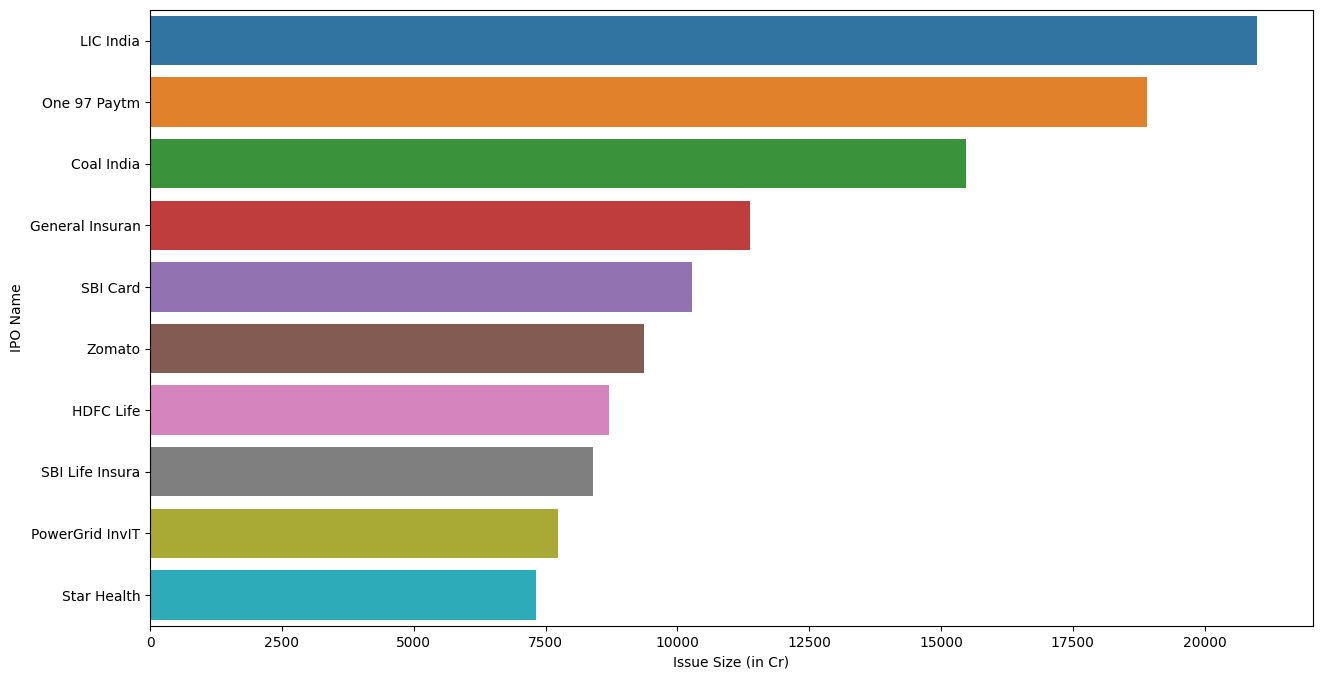

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
# Sort by 'Issue Size (in crore)' column and take the top 10
top_10_ipos = df.sort_values('Issue Size', ascending=False).head(10)

# Plot
plt.figure(figsize=(15,8))
sns.barplot(x='Issue Size', y='IPO Name', data=top_10_ipos, orient='h')
plt.xlabel('Issue Size (in Cr)')
plt.ylabel('IPO Name')
plt.show()


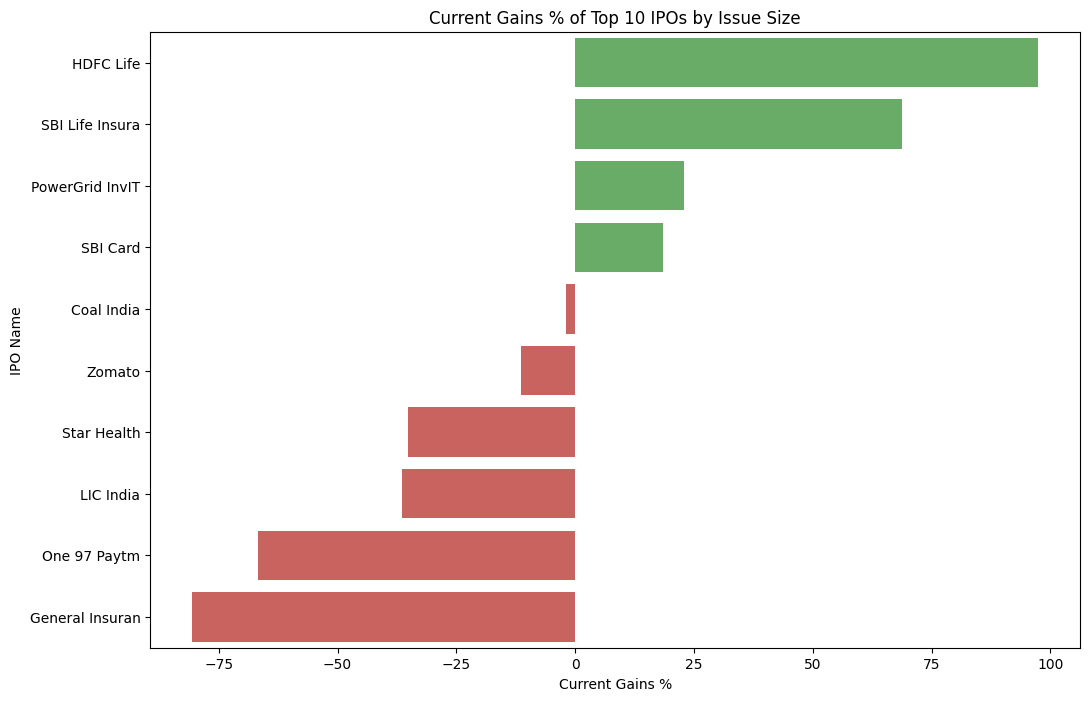

In [18]:
# Select the top 10 IPOs in terms of Issue Size
top_10_IPOs = df.nlargest(10, 'Issue Size')

# Sort these IPOs by 'Current Gains %' for a cleaner visualization
top_10_IPOs = top_10_IPOs.sort_values('Current Gains %', ascending=False)

# Set color scheme for positive and negative values
bar_colors = ['#d9534f' if x < 0 else '#5cb85c' for x in top_10_IPOs['Current Gains %']]

# Now let's plot 'Current Gains %' for these IPOs
plt.figure(figsize=(12,8))
sns.barplot(x='Current Gains %', y='IPO Name', data=top_10_IPOs, palette=bar_colors)

plt.title('Current Gains % of Top 10 IPOs by Issue Size')
plt.xlabel('Current Gains %')
plt.ylabel('IPO Name')

plt.show()



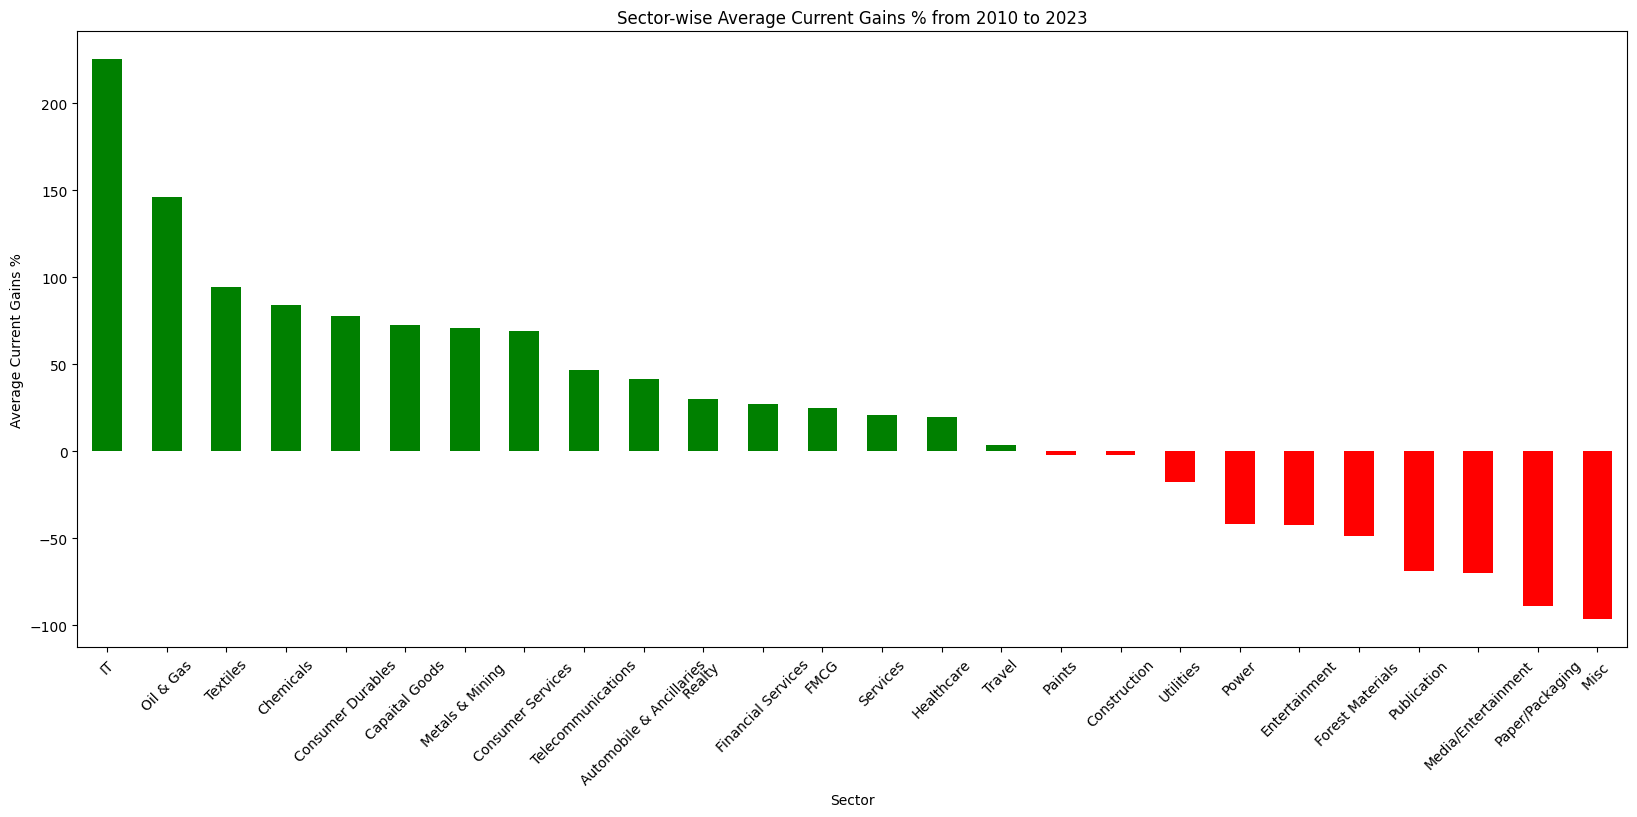

In [19]:
# Filter data for specified date range
df_date_filtered = df[(df['Date'] >= '2010-01-01') & (df['Date'] <= '2023-12-31')]

# Group the filtered data by 'Sector' and calculate the mean of 'Current Gains %'
sector_gains = df_date_filtered.groupby('Sector')['Current Gains %'].mean().sort_values(ascending=False)

# Define colors for the bar chart
colors = ['green' if x > 0 else 'red' for x in sector_gains]

# Plot the data
plt.figure(figsize=(20,8))
sector_gains.plot(kind='bar', color=colors)
plt.xlabel('Sector')
plt.ylabel('Average Current Gains %')
plt.title('Sector-wise Average Current Gains % from 2010 to 2023')
plt.xticks(rotation=45)
plt.show()




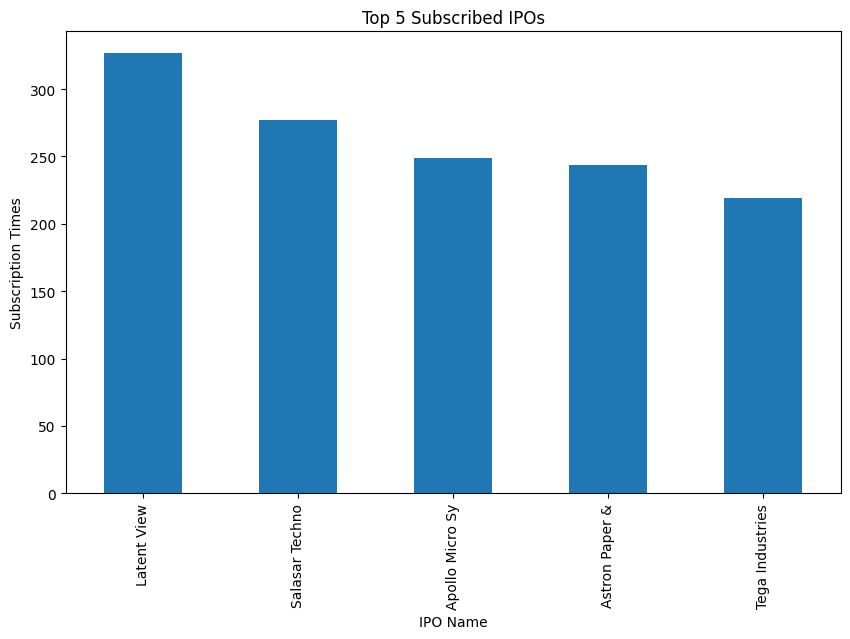

In [20]:
# Sort the dataframe by 'Total' and select the top 5 rows
top5_subscribed = df.sort_values('Total', ascending=False).head(5)

# Set 'IPO Name' as the index (for easier plotting)
top5_subscribed.set_index('IPO Name', inplace=True)

# Plot 'Total' column of the top 5 subscribed IPOs
plt.figure(figsize=(10,6))
top5_subscribed['Total'].plot(kind='bar')
plt.xlabel('IPO Name')
plt.ylabel('Subscription Times')
plt.title('Top 5 Subscribed IPOs')
plt.show()


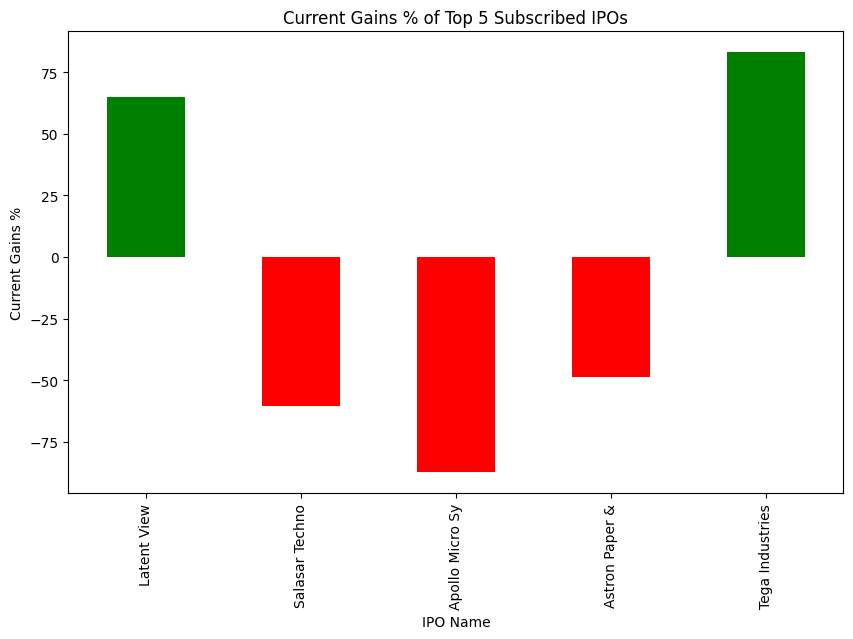

In [21]:
# Select 'Current Gains %' for these top 5 subscribed IPOs
top5_subscribed_gains = top5_subscribed['Current Gains %']

# Plot 'Current Gains %' of the top 5 subscribed IPOs
plt.figure(figsize=(10,6))
top5_subscribed_gains.plot(kind='bar', color = np.where(top5_subscribed_gains>=0, 'g', 'r'))
plt.xlabel('IPO Name')
plt.ylabel('Current Gains %')
plt.title('Current Gains % of Top 5 Subscribed IPOs')
plt.show()


In [22]:
from datetime import datetime

# Assume current date is 2023-05-26
current_date = datetime.strptime('2023-05-26', '%Y-%m-%d')

# Convert 'Date' column to datetime format if it's not
df['Date'] = pd.to_datetime(df['Date'])

# Filter out IPOs that are older than 10 years
old_IPOs = df[df['Date'] <= (current_date - pd.DateOffset(years=10))]

old_IPOs


,Date,IPO Name,Sector,Issue Size,QIB,HNI,RII,Total,Issue,Listing Open,Listing Close,Listing Gains %,CMP,Current Gains %,Year
229,2013-04-01,Repco Home,Financial Services,270.38,3.39,0.35,0.51,1.65,172,159.95,160.85,-6.48,225.20,30.93,2013
230,2012-12-28,INDUS TOWERS,Telecommunications,4533.60,2.84,0.10,0.06,1.21,220,200.00,191.20,-13.09,147.60,-32.91,2012
231,2012-12-27,PC Jeweller,Consumer Durables,609.30,7.33,18.12,1.68,6.85,135,137.00,74.50,-44.81,25.67,-80.99,2012
232,2012-12-26,CARE Ratings,Financial Services,539.98,45.80,110.96,6.18,40.98,750,940.00,923.95,23.19,665.30,-11.29,2012
233,2012-12-06,Tara Jewels,Consumer Durables,0.00,1.49,3.10,2.05,1.98,230,242.00,229.95,-0.02,0.76,-99.67,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,2010-02-19,Thangamayil,Consumer Durables,0.00,0.52,1.52,2.26,1.12,75,70.00,71.10,-5.20,1298.00,1630.67,2010
332,2010-02-15,Syncom Health,Healthcare,56.25,0.99,16.60,6.25,5.17,75,88.00,87.85,17.13,4.06,-94.59,2010
333,2010-02-15,Vascon Engineer,Construction,199.80,1.12,3.65,0.62,1.22,165,155.90,146.38,-11.28,38.23,-76.83,2010
334,2010-02-08,Jubilant Food,Consumer Services,328.70,59.39,51.95,3.79,31.11,145,160.00,22.90,-84.21,489.05,237.28,2010


C:\Users\HP\AppData\Local\Temp\ipykernel_9600\1668620576.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  old_IPOs['Return'] = old_IPOs['Current Gains %'].apply(lambda x: 'Positive' if x > 0 else 'Negative')


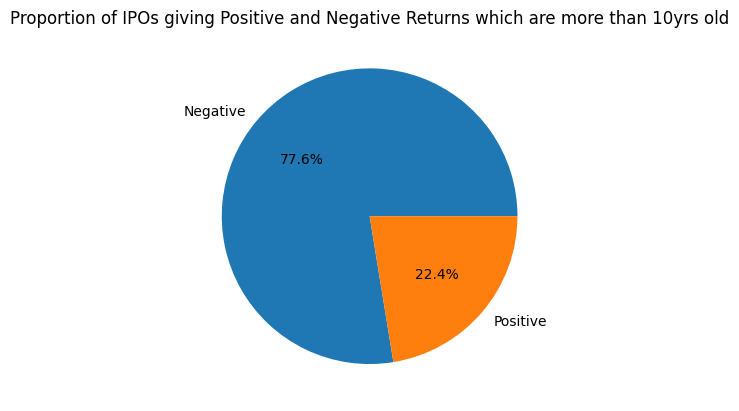

In [23]:
# Create a new column 'Return' which would contain 'Positive' if 'Current Gains %' is greater than 0 else 'Negative'
old_IPOs['Return'] = old_IPOs['Current Gains %'].apply(lambda x: 'Positive' if x > 0 else 'Negative')

# Count the number of positive and negative returns
returns = old_IPOs['Return'].value_counts()

# Plot a pie chart
returns.plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportion of IPOs giving Positive and Negative Returns which are more than 10yrs old')
plt.ylabel('')  # to remove the 'None' ylabel
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_9600\3696452363.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_IPOs['Return'] = new_IPOs['Current Gains %'].apply(lambda x: 'Positive' if x > 0 else 'Negative')


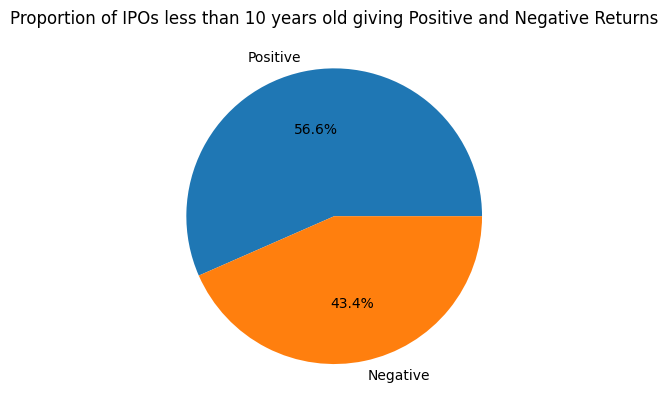

In [24]:
# Get the current year
current_year = pd.to_datetime('today').year

# Find IPOs which are less than 10 years old
new_IPOs = df[df['Year'] > (current_year - 10)]

# Create a new column 'Return' which would contain 'Positive' if 'Current Gains %' is greater than 0 else 'Negative'
new_IPOs['Return'] = new_IPOs['Current Gains %'].apply(lambda x: 'Positive' if x > 0 else 'Negative')

# Count the number of positive and negative returns
returns = new_IPOs['Return'].value_counts()

# Plot a pie chart
returns.plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportion of IPOs less than 10 years old giving Positive and Negative Returns')
plt.ylabel('')  # to remove the 'None' ylabel
plt.show()


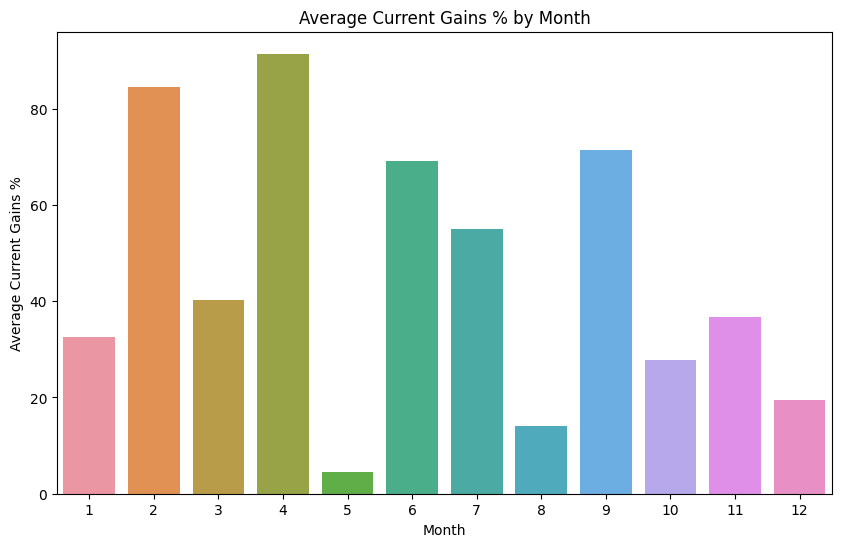

In [27]:
# Create a new column 'Month'
df['Month'] = df['Date'].dt.month

# Group by 'Month' and calculate average 'Current Gains %'
average_monthly_gains = df.groupby('Month')['Current Gains %'].mean()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=average_monthly_gains.index, y=average_monthly_gains.values)
plt.xlabel('Month')
plt.ylabel('Average Current Gains %')
plt.title('Average Current Gains % by Month')
plt.show()


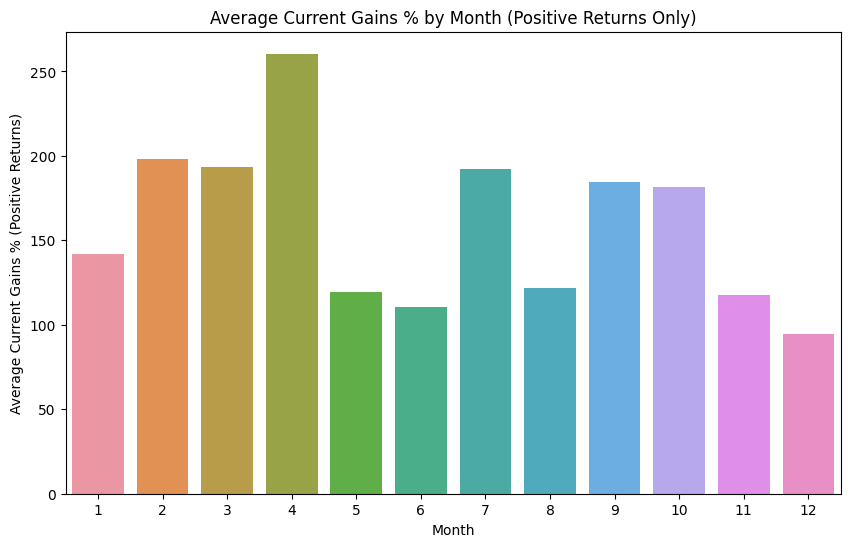

In [28]:
# Filter the DataFrame to include only the IPOs with positive 'Current Gains %'
positive_gains_df = df[df['Current Gains %'] > 0]

# Group by 'Month' and calculate average 'Current Gains %' for positive gains
average_monthly_gains_positive = positive_gains_df.groupby('Month')['Current Gains %'].mean()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=average_monthly_gains_positive.index, y=average_monthly_gains_positive.values)
plt.xlabel('Month')
plt.ylabel('Average Current Gains % (Positive Returns)')
plt.title('Average Current Gains % by Month (Positive Returns Only)')
plt.show()


In [29]:
# Filter the DataFrame to include only the IPOs with positive 'Current Gains %'
positive_gains_df = df[df['Current Gains %'] > 0]

# Group by 'Sector' and sort by 'Current Gains %' within each group, then take top 3
top_3_ipos_per_sector = positive_gains_df.groupby('Sector').apply(lambda x: x.sort_values('Current Gains %', ascending=False).head(3))

# Reset the index for clean formatting
top_3_ipos_per_sector.reset_index(drop=True, inplace=True)

print(top_3_ipos_per_sector[['Sector', 'IPO Name', 'Current Gains %']])


                      Sector         IPO Name  Current Gains %
0   Automobile & Ancillaries        GNA Axles           268.36
1   Automobile & Ancillaries  Endurance Techn           195.97
2   Automobile & Ancillaries        Craftsman           127.82
3             Capaital Goods     Mazagon Dock           418.93
4             Capaital Goods      Hariom Pipe           295.36
5             Capaital Goods  Bharat Wire Rop           263.00
6                  Chemicals    Fine Organics           470.80
7                  Chemicals    Fineotex Chem           330.00
8                  Chemicals      Sharda Crop           205.77
9               Construction       Rail Vikas           504.21
10              Construction       Power Mech           399.53
11              Construction     PSP Projects           240.86
12         Consumer Durables      Thangamayil          1630.67
13         Consumer Durables  PG Electroplast           615.21
14         Consumer Durables     Rushil Decor          

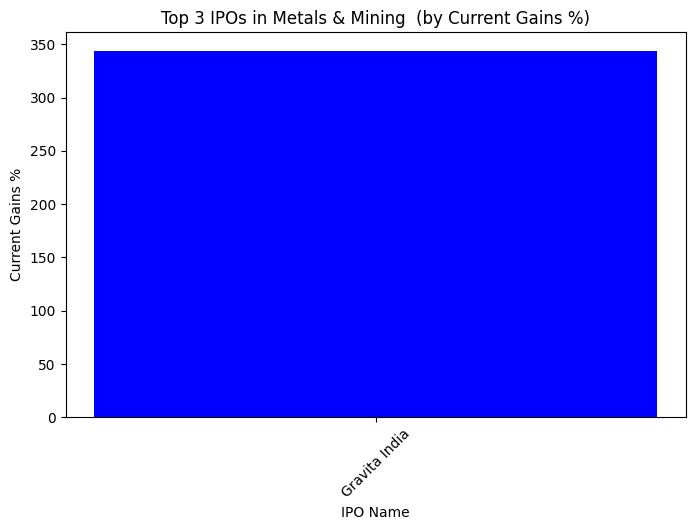

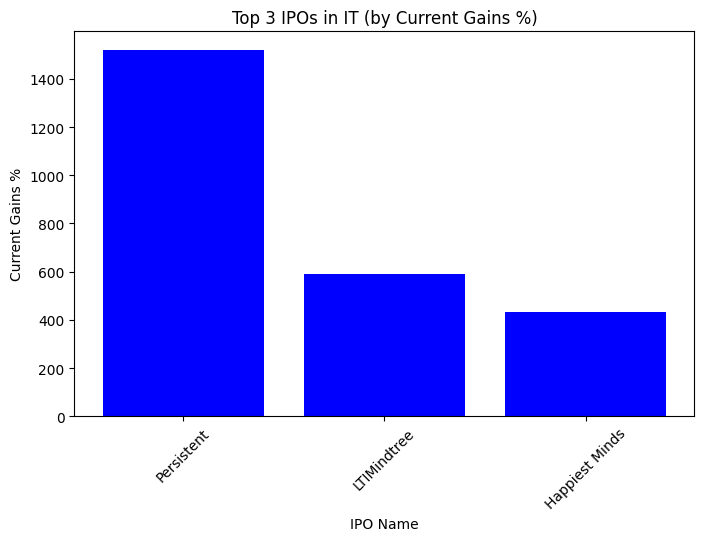

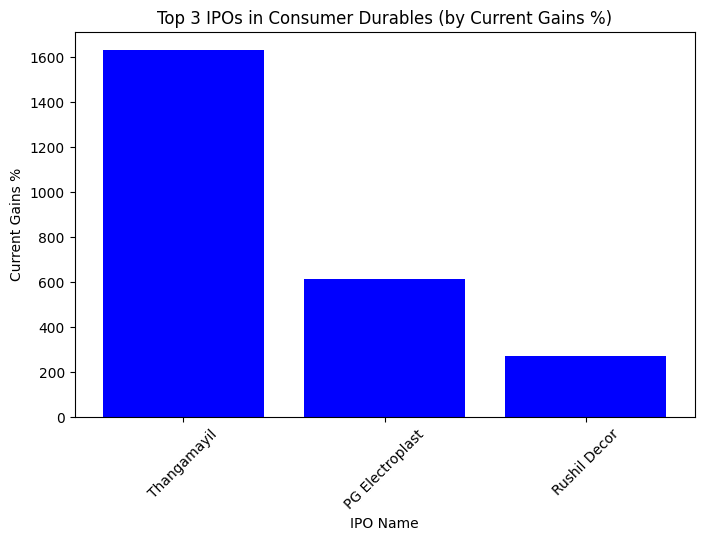

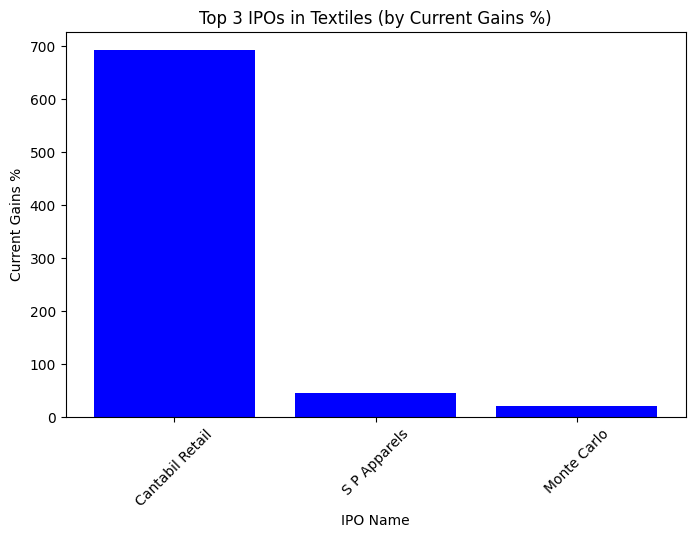

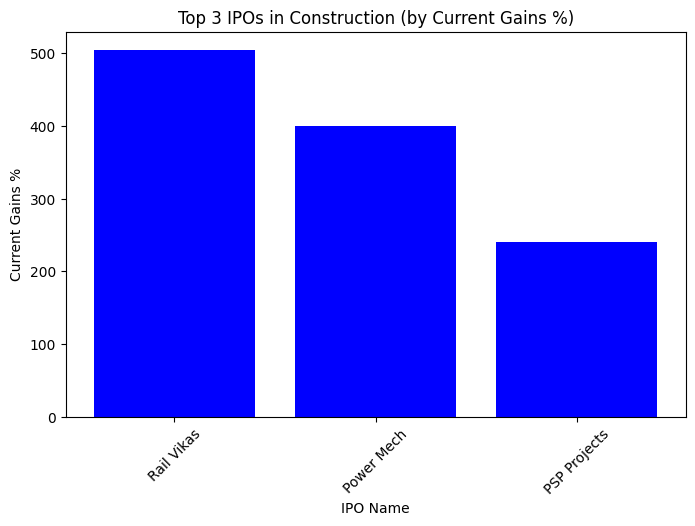

In [30]:
import matplotlib.pyplot as plt

# Get the top 5 sectors with the highest average 'Current Gains %'
top_5_sectors = positive_gains_df.groupby('Sector')['Current Gains %'].mean().nlargest(5).index

# Filter top_3_ipos_per_sector to include only the top 5 sectors
filtered_top_3_ipos = top_3_ipos_per_sector[top_3_ipos_per_sector['Sector'].isin(top_5_sectors)]

# Loop through each sector and create a bar chart
for sector in top_5_sectors:
    ipos_in_sector = filtered_top_3_ipos[filtered_top_3_ipos['Sector'] == sector]
    plt.figure(figsize=(8, 5))
    plt.bar(ipos_in_sector['IPO Name'], ipos_in_sector['Current Gains %'], color='blue')
    plt.title(f'Top 3 IPOs in {sector} (by Current Gains %)')
    plt.xlabel('IPO Name')
    plt.ylabel('Current Gains %')
    plt.xticks(rotation=45)
    plt.show()


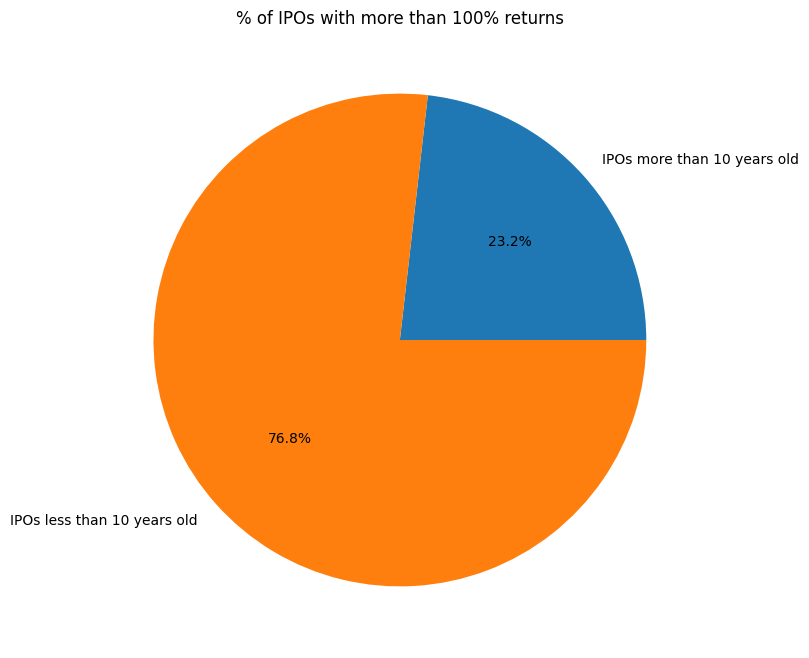

In [31]:
# Filter IPOs with 'Current Gains %' more than 100
df_high_gains = df[df['Current Gains %'] > 100]

# Calculate IPOs more than 10 years old
older_ipos = df_high_gains[df_high_gains['Date'].dt.year <= 2013]

# Calculate IPOs less than 10 years old
newer_ipos = df_high_gains[df_high_gains['Date'].dt.year > 2013]

# Calculate the number of IPOs in each category
older_ipos_count = older_ipos.shape[0]
newer_ipos_count = newer_ipos.shape[0]

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie([older_ipos_count, newer_ipos_count], labels=['IPOs more than 10 years old', 'IPOs less than 10 years old'], autopct='%1.1f%%')
plt.title('% of IPOs with more than 100% returns')
plt.show()


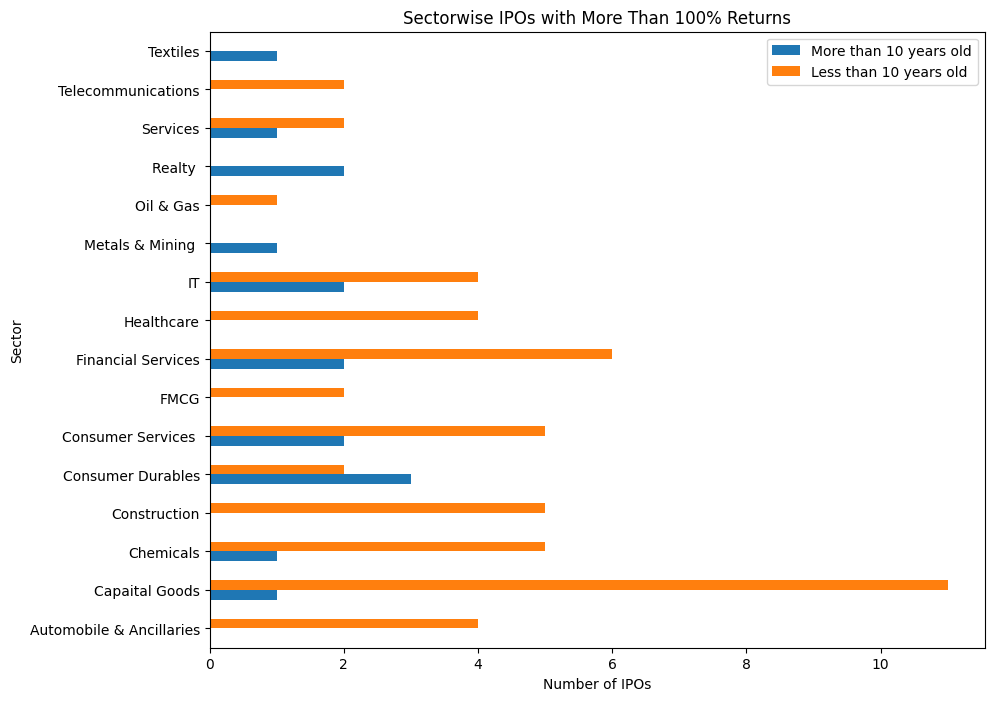

In [32]:
# Determine current year
current_year = 2023

# Define old and young IPOs
old_ipos = df[df['Year'] <= (current_year - 10)]
young_ipos = df[df['Year'] > (current_year - 10)]

# Filter the data for those with more than 100% gain
old_gains_100 = old_ipos[old_ipos['Current Gains %'] > 100]
young_gains_100 = young_ipos[young_ipos['Current Gains %'] > 100]

# Group the data by sector and calculate the size
sectorwise_old = old_gains_100.groupby('Sector').size()
sectorwise_young = young_gains_100.groupby('Sector').size()

# Create a DataFrame for plotting
df_sectorwise = pd.DataFrame({'More than 10 years old': sectorwise_old, 'Less than 10 years old': sectorwise_young})

# Plot
df_sectorwise.plot(kind='barh', figsize=(10, 8))
plt.title('Sectorwise IPOs with More Than 100% Returns')
plt.xlabel('Number of IPOs')
plt.show()



# Trend Analysis 



### Yearly trend of IPO issuance 

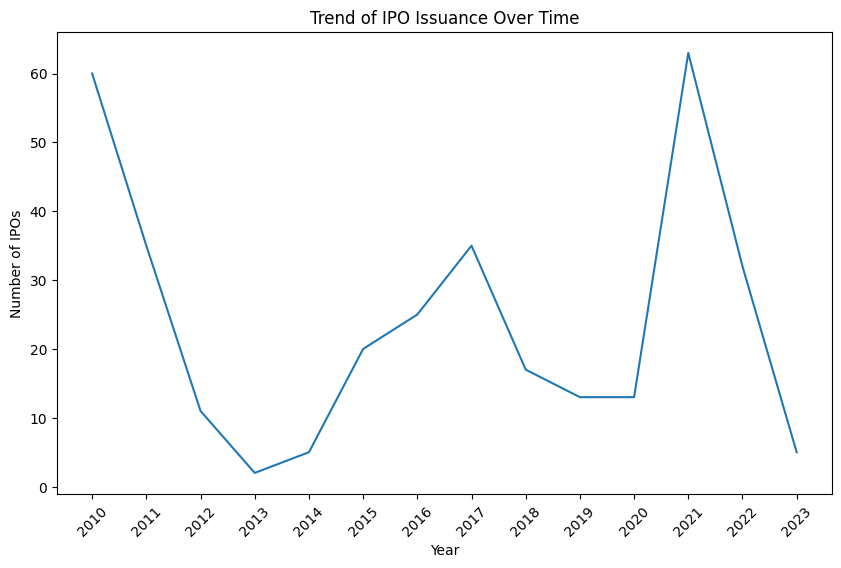

In [33]:
years = sorted(df['Year'].unique())
num_ipos = df.groupby('Year').size()

plt.figure(figsize=(10,6))
plt.plot(years, num_ipos.loc[years])
plt.title('Trend of IPO Issuance Over Time')
plt.xlabel('Year')
plt.ylabel('Number of IPOs')
plt.xticks(years, rotation=45)  # xticks method is used to set the labels
plt.show()


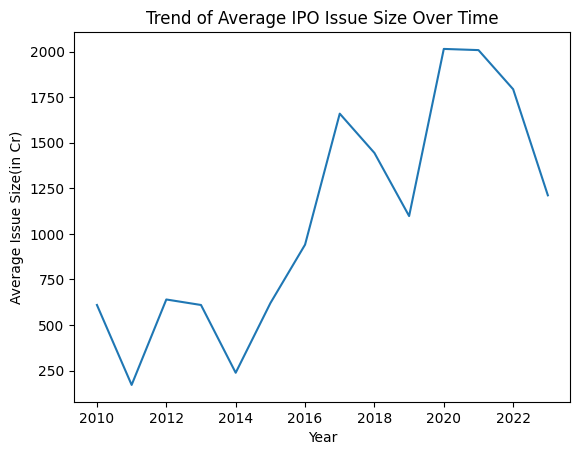

In [34]:
df.groupby('Year')['Issue Size'].mean().plot(kind='line')
plt.title('Trend of Average IPO Issue Size Over Time')
plt.xlabel('Year')
plt.ylabel('Average Issue Size(in Cr)')
plt.show()


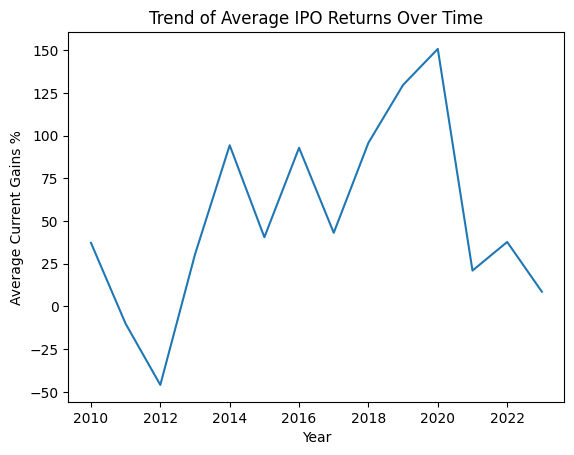

In [35]:
df.groupby('Year')['Current Gains %'].mean().plot(kind='line')
plt.title('Trend of Average IPO Returns Over Time')
plt.xlabel('Year')
plt.ylabel('Average Current Gains %')
plt.show()


In [36]:
correlation = df['Issue Size'].corr(df['Current Gains %'])
print('Correlation between Issue Size and Current Gains %: ', correlation)


Correlation between Issue Size and Current Gains %:  -0.05258686235684862


In [37]:
correlation = df['Issue Size'].corr(df['Listing Gains %'])
print('Correlation between Issue Size and Listing Gains %: ', correlation)


Correlation between Issue Size and Listing Gains %:  0.011397906816902087


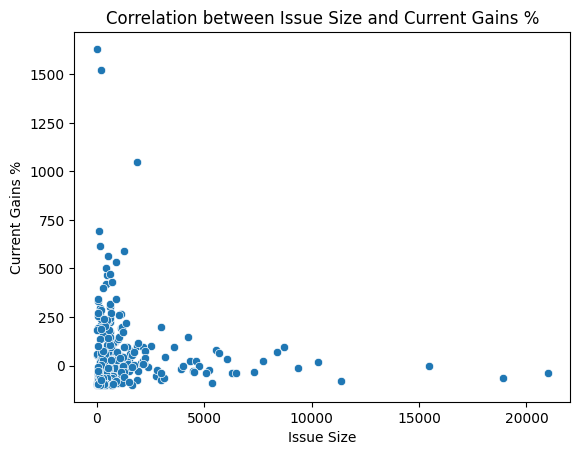

In [38]:
import seaborn as sns

sns.scatterplot(data=df, x='Issue Size', y='Current Gains %')
plt.title('Correlation between Issue Size and Current Gains %')
plt.show()


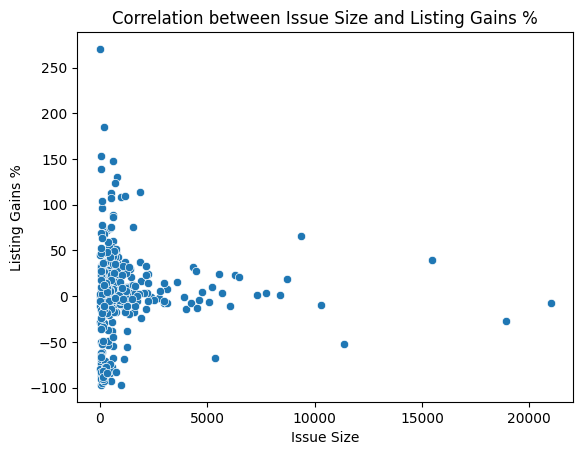

In [39]:
sns.scatterplot(data=df, x='Issue Size', y='Listing Gains %')
plt.title('Correlation between Issue Size and Listing Gains %')
plt.show()

### Performance by sector 

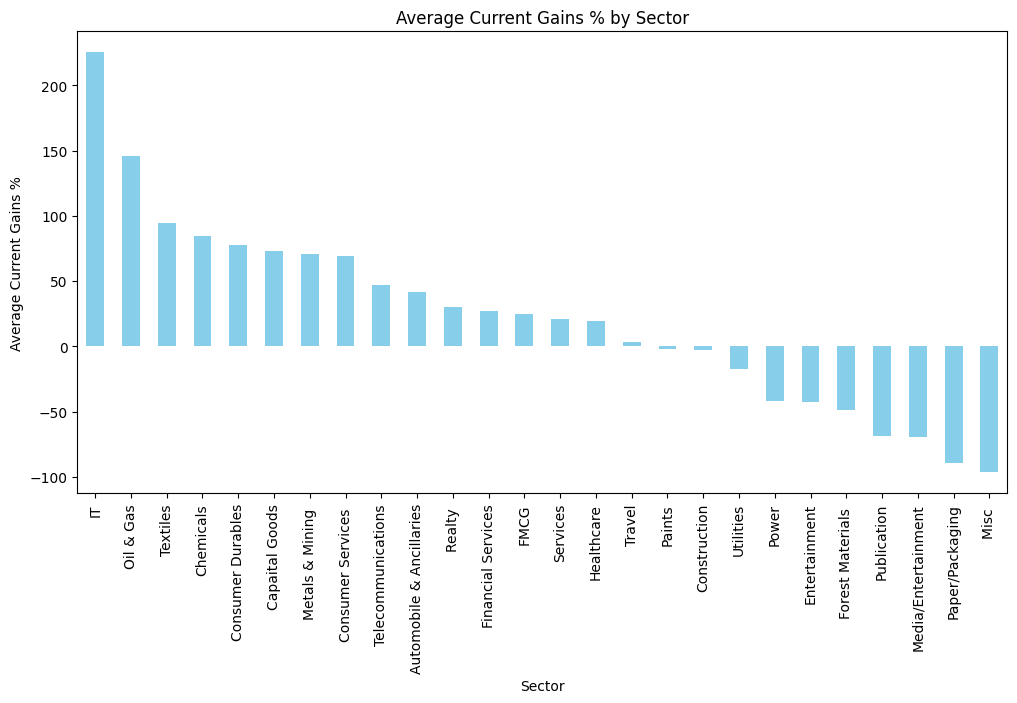

In [40]:
# Group the data by 'Sector' and calculate the mean 'Current Gains %' for each sector
sector_gains = df.groupby('Sector')['Current Gains %'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12,6))
sector_gains.plot(kind='bar', color='skyblue')
plt.title('Average Current Gains % by Sector')
plt.xlabel('Sector')
plt.ylabel('Average Current Gains %')
plt.xticks(rotation=90)
plt.show()


## Performance by subscription level 

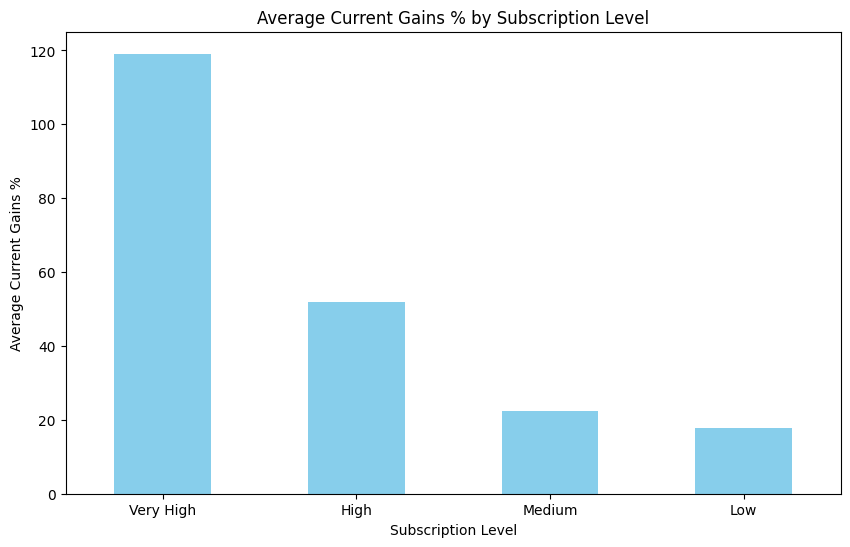

In [41]:
# Define bins and their labels
bins = [0, 2, 10, 50, np.inf]
labels = ['Low', 'Medium', 'High', 'Very High']

# Create a new column 'Subscription Level' in the dataframe based on 'Total' column
df['Subscription Level'] = pd.cut(df['Total'], bins=bins, labels=labels)

# Group the data by 'Subscription Level' and calculate the mean 'Current Gains %' for each level
subscription_gains = df.groupby('Subscription Level')['Current Gains %'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10,6))
subscription_gains.plot(kind='bar', color='skyblue')
plt.title('Average Current Gains % by Subscription Level')
plt.xlabel('Subscription Level')
plt.ylabel('Average Current Gains %')
plt.xticks(rotation=0)
plt.show()


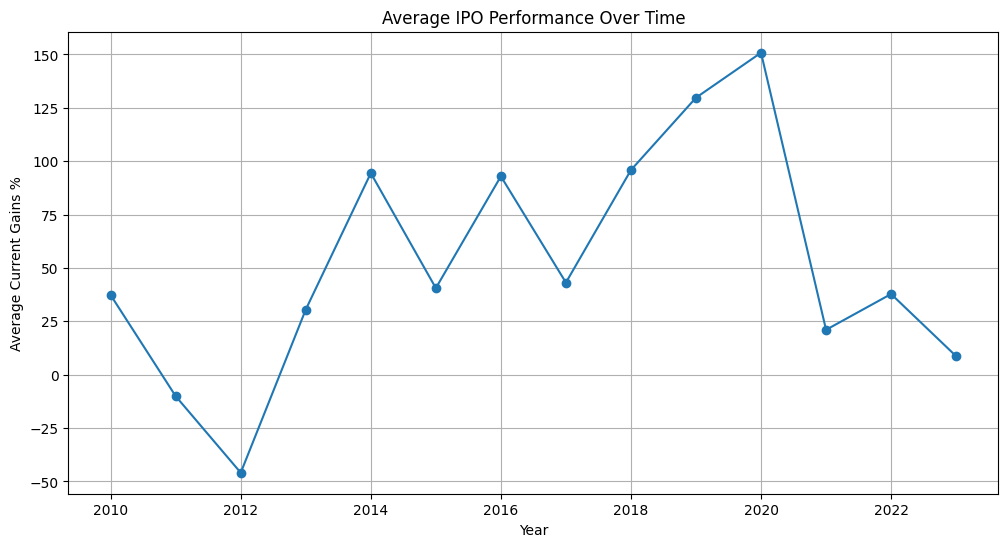

In [42]:
# First, we need to extract the year from the 'Date' column
df['Year'] = pd.DatetimeIndex(df['Date']).year

# Then, we calculate the average 'Current Gains %' for each year
yearly_avg_gains = df.groupby('Year')['Current Gains %'].mean()

# Now we can plot the data
plt.figure(figsize=(12, 6))
yearly_avg_gains.plot(kind='line', marker='o', linestyle='-')
plt.title('Average IPO Performance Over Time')
plt.xlabel('Year')
plt.ylabel('Average Current Gains %')
plt.grid()
plt.show()


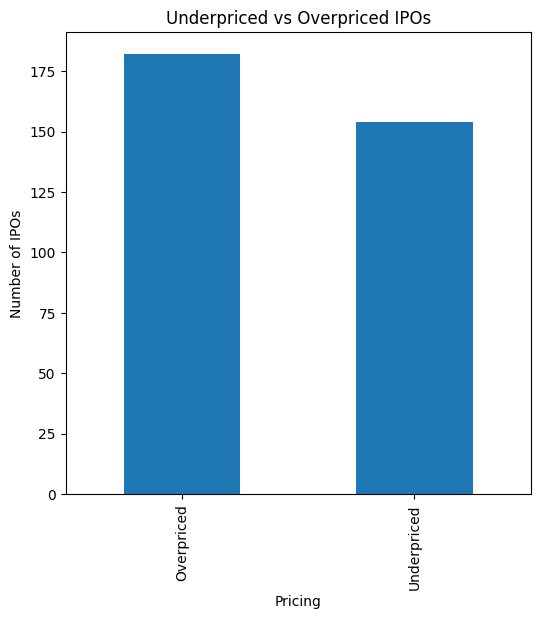

In [43]:
# Create a new column to determine whether an IPO was underpriced or overpriced
df['Pricing'] = df['Current Gains %'].apply(lambda x: 'Underpriced' if x > 0 else 'Overpriced')

# Calculate the number of underpriced and overpriced IPOs
pricing_counts = df['Pricing'].value_counts()

# Plot the data
plt.figure(figsize=(6,6))
pricing_counts.plot(kind='bar')
plt.title('Underpriced vs Overpriced IPOs')
plt.xlabel('Pricing')
plt.ylabel('Number of IPOs')
plt.show()


In [44]:
nifty_df = pd.read_csv(r"C:\Users\HP\Downloads\^NSEI.csv")
nifty_df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-27,5008.500000,5008.500000,4833.049805,4853.100098,4853.100098,0.0
1,2010-01-28,4863.000000,4929.899902,4824.950195,4867.250000,4867.250000,0.0
2,2010-01-29,4866.149902,4893.700195,4766.000000,4882.049805,4882.049805,0.0
3,2010-02-01,4882.049805,4918.799805,4827.149902,4899.700195,4899.700195,0.0
4,2010-02-02,4907.850098,4951.149902,4814.100098,4830.100098,4830.100098,0.0


In [45]:
nifty_df.columns = nifty_df.columns.str.strip()

In [46]:
nifty_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [47]:
nifty_df = nifty_df.reset_index()
nifty_df.columns


Index(['index', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [48]:
# Convert the 'Date' column to datetime format
nifty_df['Date'] = pd.to_datetime(nifty_df['Date'])

# Set the 'Date' column as the index
nifty_df.set_index('Date', inplace=True)


In [49]:

# Group the data by year and extract the first (opening) and last (closing) price of each year
nifty_df_resampled = nifty_df.resample('Y').agg({'Close': ['first', 'last']})

# Calculate the yearly returns
nifty_df_resampled['Yearly Return'] = (nifty_df_resampled['Close']['last'] / nifty_df_resampled['Close']['first']) - 1

# Reset the index so 'Date' becomes a column again
nifty_df_resampled.reset_index(inplace=True)

# Extract the year from the 'Date' column and add it as a new column
nifty_df_resampled['Year'] = nifty_df_resampled['Date'].dt.year

print(nifty_df_resampled[['Year', 'Yearly Return']])


    Year Yearly Return
                      
0   2010      0.264037
1   2011     -0.249009
2   2012      0.239188
3   2013      0.051850
4   2014      0.331378
5   2015     -0.053493
6   2016      0.050633
7   2017      0.287450
8   2018      0.040255
9   2019      0.127491
10  2020      0.147691
11  2021      0.237939
12  2022      0.027210
13  2023      0.016590


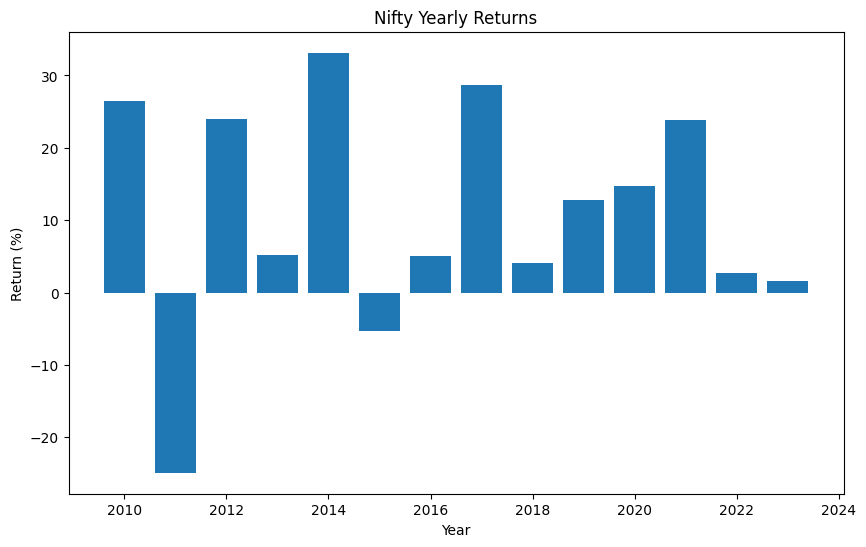

In [50]:
# Now you can resample and plot
nifty_df_resampled = nifty_df.resample('Y').agg({'Close': ['first', 'last']})
nifty_df_resampled['Yearly Return'] = (nifty_df_resampled['Close']['last'] / nifty_df_resampled['Close']['first']) - 1
nifty_df_resampled['Yearly Return'] = nifty_df_resampled['Yearly Return'] * 100

# Plot
plt.figure(figsize=(10,6))
plt.bar(nifty_df_resampled.index.year, nifty_df_resampled['Yearly Return'])
plt.xlabel('Year')
plt.ylabel('Return (%)')
plt.title('Nifty Yearly Returns')
plt.show()


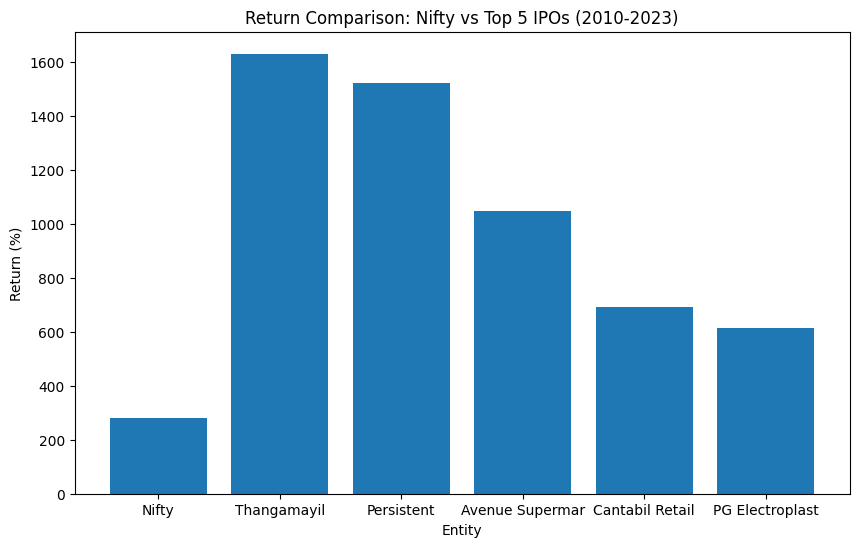

In [51]:
# Calculate overall return of Nifty from 2010 to 2023
nifty_return = (nifty_df["Close"].iloc[-1] / nifty_df["Close"].iloc[0] - 1) * 100

# Get top 5 IPOs in terms of 'Current Gains %'
top_5_ipos = df.nlargest(5, 'Current Gains %')

# Create a DataFrame to store the returns for comparison
returns_comparison = pd.DataFrame({
    'Entity': ['Nifty'] + list(top_5_ipos['IPO Name']),
    'Return (%)': [nifty_return] + list(top_5_ipos['Current Gains %'])
})

# Plot the comparison
plt.figure(figsize=(10,6))
plt.bar(returns_comparison['Entity'], returns_comparison['Return (%)'])
plt.xlabel('Entity')
plt.ylabel('Return (%)')
plt.title('Return Comparison: Nifty vs Top 5 IPOs (2010-2023)')
plt.show()


In [52]:
# Get the number of years
n_years = nifty_df.index.year[-1] - nifty_df.index.year[0]

# Calculate CAGR
nifty_cagr = ((nifty_df["Close"].iloc[-1] / nifty_df["Close"].iloc[0]) ** (1/n_years) - 1) * 100

print("The CAGR of Nifty from 2010 to 2023 is: ", nifty_cagr, "%")


The CAGR of Nifty from 2010 to 2023 is:  10.841619443011364 %


In [53]:
# Calculate total return
nifty_total_return = ((nifty_df["Close"].iloc[-1] / nifty_df["Close"].iloc[0]) - 1) * 100

print("The total return of Nifty from 2010 to 2023 is: ", nifty_total_return, "%")


The total return of Nifty from 2010 to 2023 is:  281.18623633218954 %


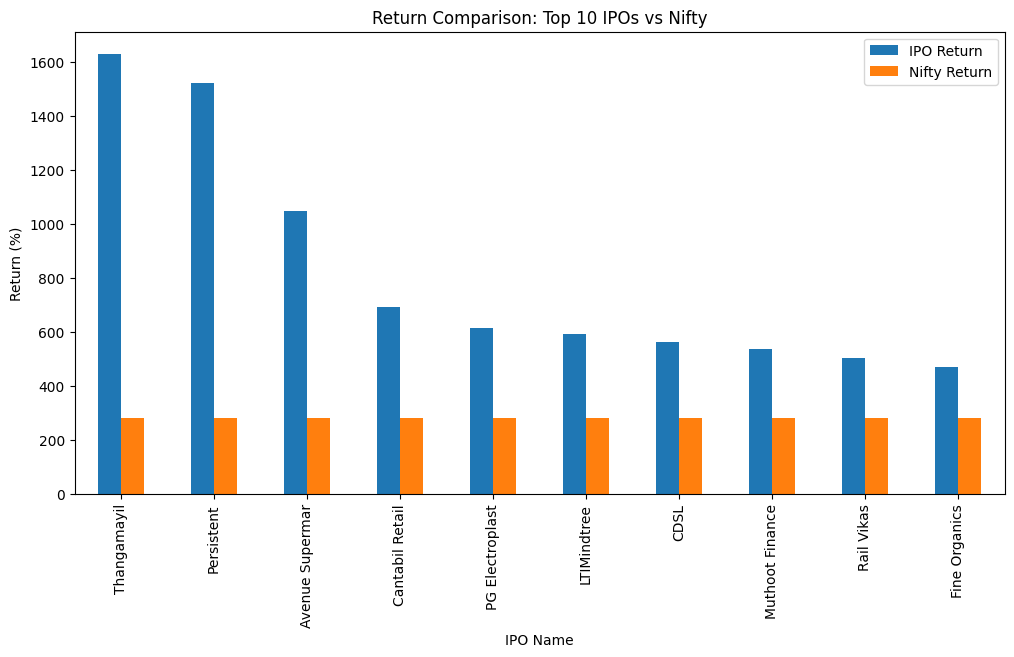

In [54]:
# Select the top 10 IPOs by current gains %
top_ipos = df.sort_values('Current Gains %', ascending=False).head(10)

# Create a new DataFrame to hold the comparison results
comparison_df = pd.DataFrame()
comparison_df['IPO Name'] = top_ipos['IPO Name']
comparison_df['IPO Return'] = top_ipos['Current Gains %']

# Get the Nifty return over the relevant period for each IPO
nifty_start = nifty_df['Close'][0]  # The close price of Nifty at the start of the period
nifty_end = nifty_df['Close'][-1]  # The close price of Nifty at the end of the period
nifty_return = (nifty_end / nifty_start - 1) * 100  # Calculate the return as a percentage

# Add the Nifty return to the comparison DataFrame
comparison_df['Nifty Return'] = nifty_return

# Plot the comparison
comparison_df.set_index('IPO Name').plot(kind='bar', figsize=(12, 6))
plt.ylabel('Return (%)')
plt.title('Return Comparison: Top 10 IPOs vs Nifty')
plt.show()


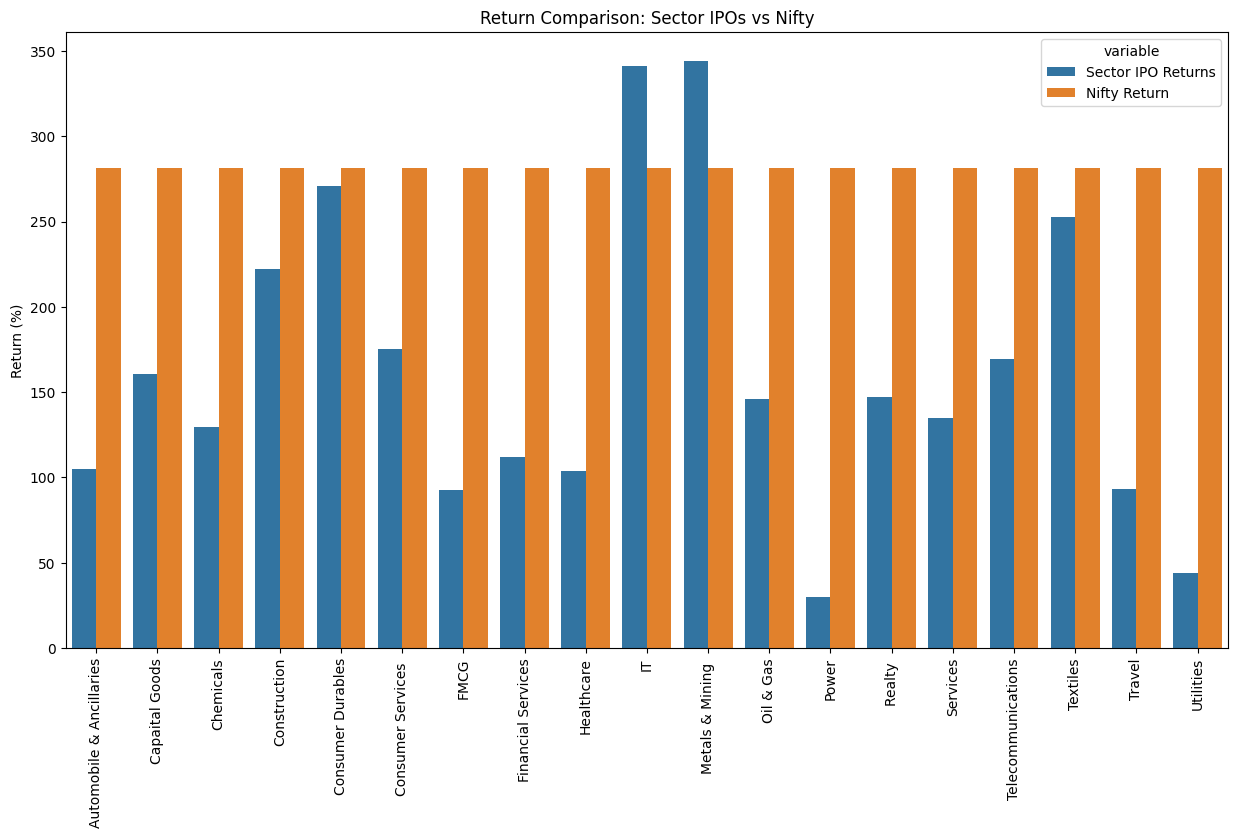

In [55]:
# Calculate the mean return for each sector
sector_returns = df[df['Current Gains %'] > 0].groupby('Sector')['Current Gains %'].mean()

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Sector IPO Returns': sector_returns,
    'Nifty Return': nifty_return
})

# Reset index to make the plot easier to create
comparison_df.reset_index(inplace=True)

# Melt the DataFrame to make it suitable for seaborn's barplot function
comparison_df = comparison_df.melt(id_vars='Sector', value_vars=['Sector IPO Returns', 'Nifty Return'])

# Plot the comparison
plt.figure(figsize=(15, 8))
sns.barplot(x='Sector', y='value', hue='variable', data=comparison_df)
plt.xlabel('')
plt.ylabel('Return (%)')
plt.title('Return Comparison: Sector IPOs vs Nifty')
plt.xticks(rotation=90)
plt.show()


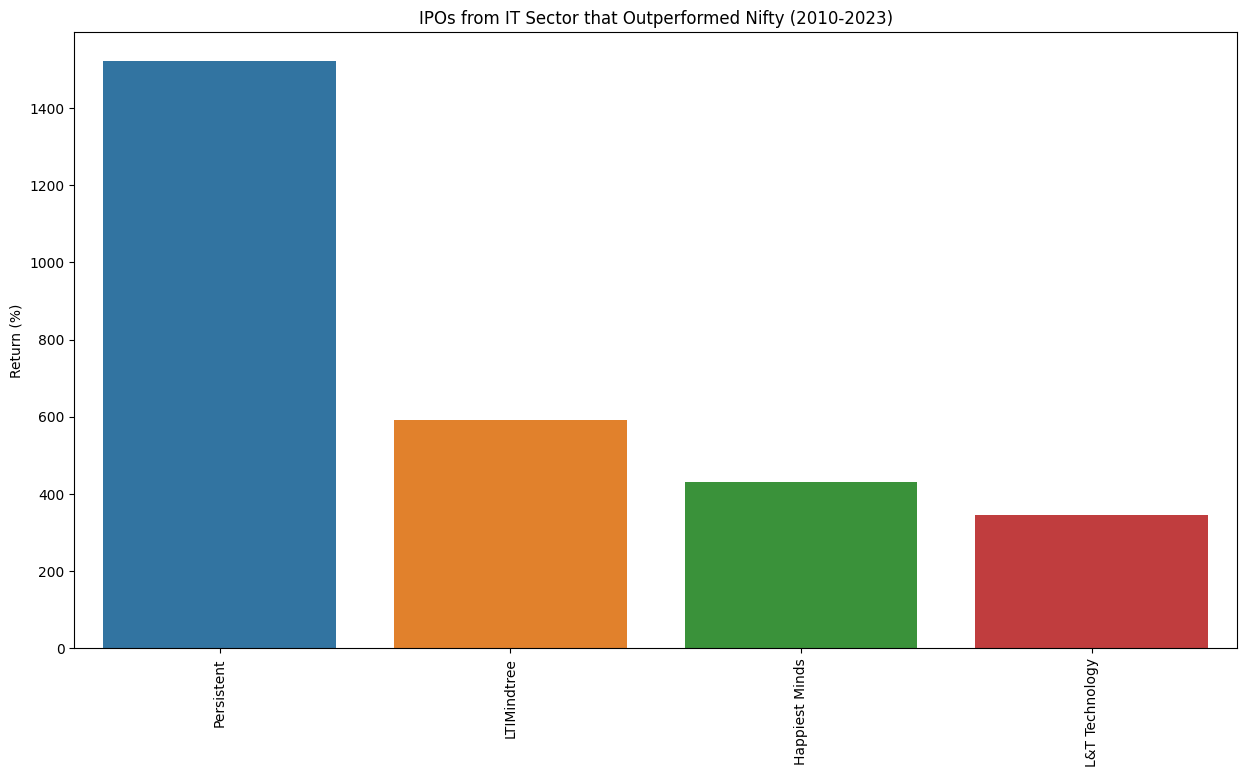

In [56]:
# Filter the IPOs from the 'IT' sector which gave more returns than Nifty
high_returns_it_df = df[(df['Current Gains %'] > nifty_return) & (df['Sector'] == 'IT')]

# Sort the DataFrame by 'Current Gains %' in descending order
high_returns_it_df = high_returns_it_df.sort_values('Current Gains %', ascending=False)

# Plot the data
plt.figure(figsize=(15, 8))
sns.barplot(x='IPO Name', y='Current Gains %', data=high_returns_it_df)
plt.xlabel('')
plt.ylabel('Return (%)')
plt.title('IPOs from IT Sector that Outperformed Nifty (2010-2023)')
plt.xticks(rotation=90)
plt.show()



In [57]:
# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Filter IPOs that are less than 10 years old
recent_df = df[df['Date'].dt.year >= 2013]

# Group by sector and calculate the average return of each sector
sector_returns = recent_df.groupby('Sector')['Current Gains %'].mean()

# Compare with Nifty's return
comparison_df = pd.DataFrame({'Sector Return': sector_returns, 'Nifty Return': nifty_return})
comparison_df['Difference'] = comparison_df['Sector Return'] - comparison_df['Nifty Return']

# Display the DataFrame
print(comparison_df)


                          Sector Return  Nifty Return  Difference
Sector                                                           
Automobile & Ancillaries      81.573000    281.186236 -199.613236
Capaital Goods               125.882105    281.186236 -155.304131
Chemicals                     72.012000    281.186236 -209.174236
Construction                  61.048824    281.186236 -220.137413
Consumer Durables             26.857273    281.186236 -254.328964
Consumer Services             94.968500    281.186236 -186.217736
Entertainment                -42.440000    281.186236 -323.626236
FMCG                          33.475455    281.186236 -247.710782
Financial Services            30.456458    281.186236 -250.729778
Forest Materials             -48.880000    281.186236 -330.066236
Healthcare                    39.842609    281.186236 -241.343628
IT                           183.105556    281.186236  -98.080681
Media/Entertainment          -60.587500    281.186236 -341.773736
Metals & M

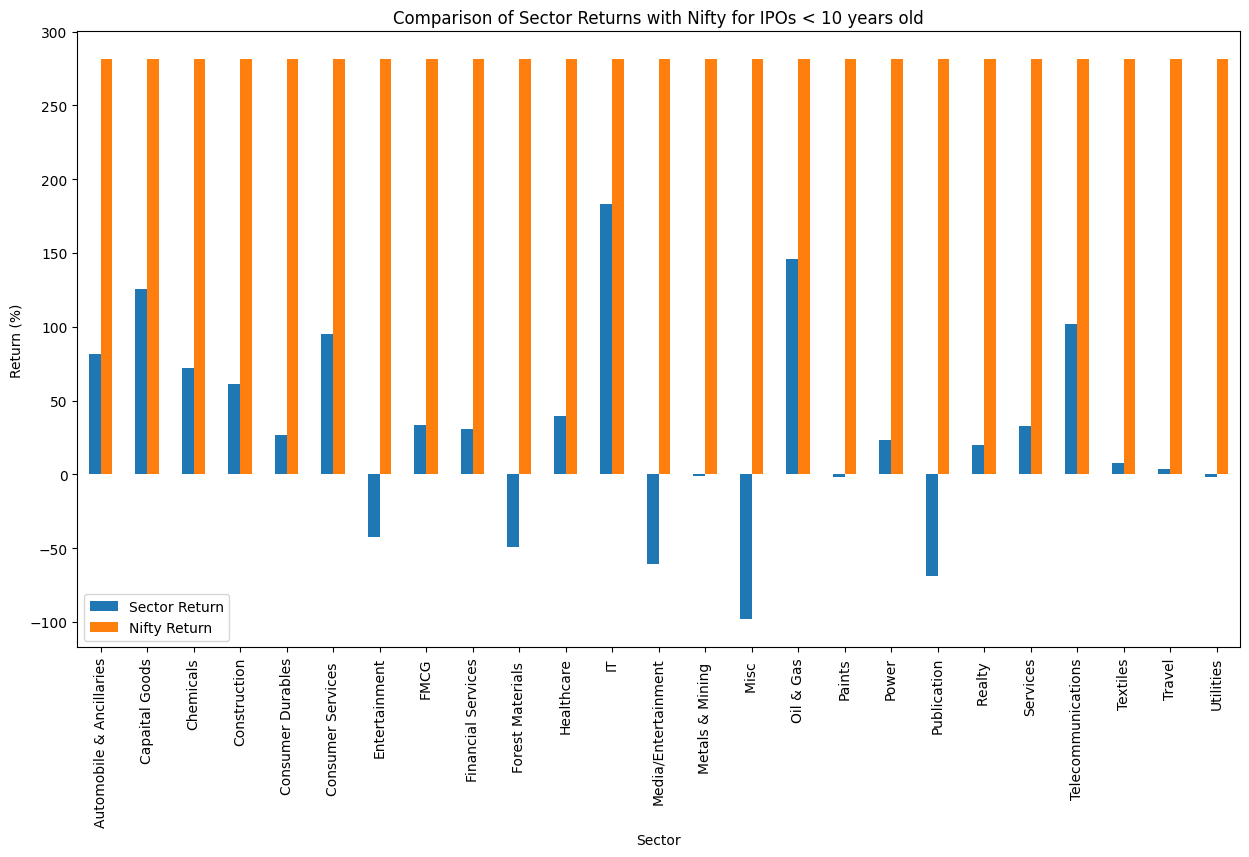

In [58]:
# Visualizing the data
comparison_df[['Sector Return', 'Nifty Return']].plot(kind='bar', figsize=(15, 8))
plt.ylabel('Return (%)')
plt.title('Comparison of Sector Returns with Nifty for IPOs < 10 years old')
plt.show()


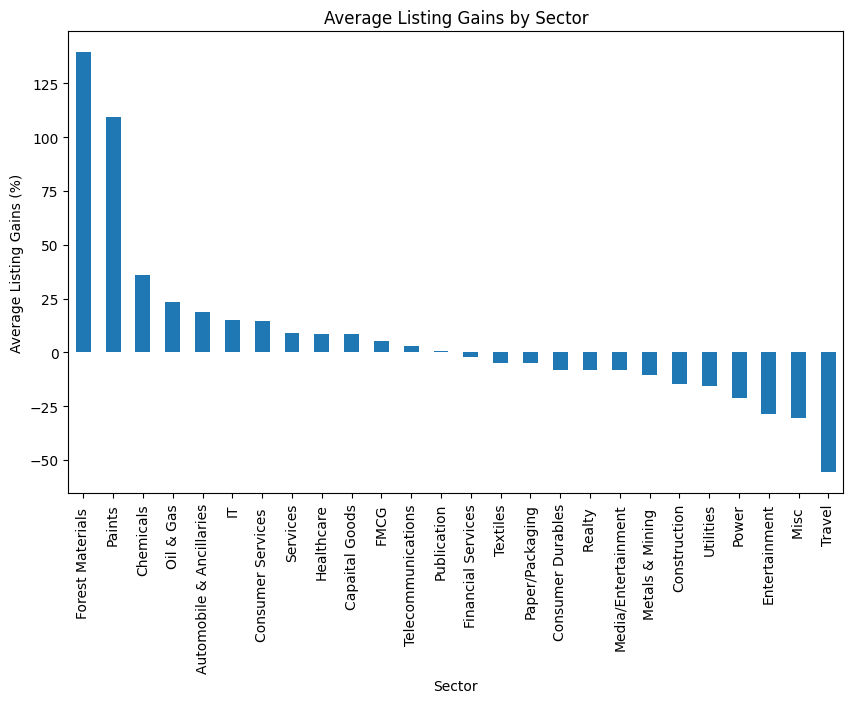

In [59]:
# Group by sector and calculate average listing gains
sector_gains = df.groupby('Sector')['Listing Gains %'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,6))
sector_gains.plot(kind='bar')
plt.xlabel('Sector')
plt.ylabel('Average Listing Gains (%)')
plt.title('Average Listing Gains by Sector')
plt.xticks(rotation=90)
plt.show()


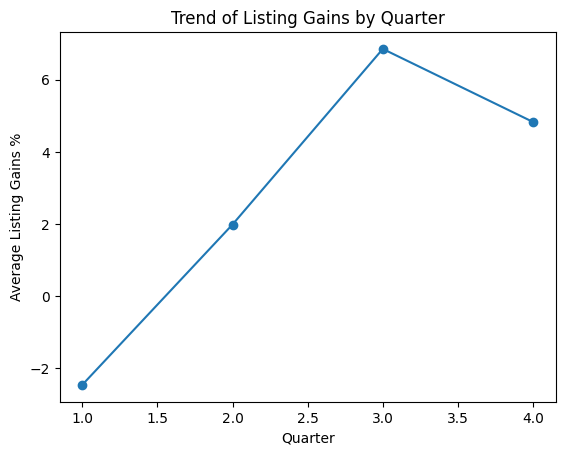

In [60]:
df['Quarter'] = df['Date'].dt.quarter
quarter_listings = df.groupby('Quarter')['Listing Gains %'].mean()
plt.plot(quarter_listings.index, quarter_listings.values, marker='o')
plt.xlabel('Quarter')
plt.ylabel('Average Listing Gains %')
plt.title('Trend of Listing Gains by Quarter')
plt.show()




## Over subscription analysis

C:\Users\HP\AppData\Local\Temp\ipykernel_9600\2979211085.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  oversubscription_groups = df.groupby('Total')['Listing Gains %', 'Current Gains %'].mean()


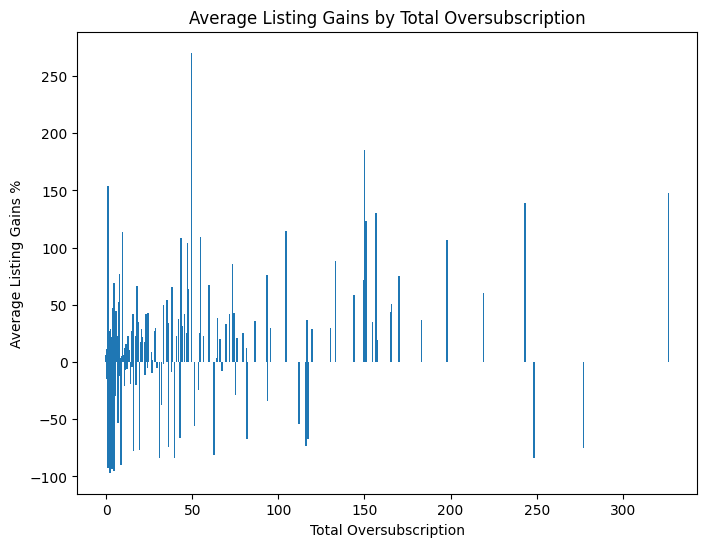

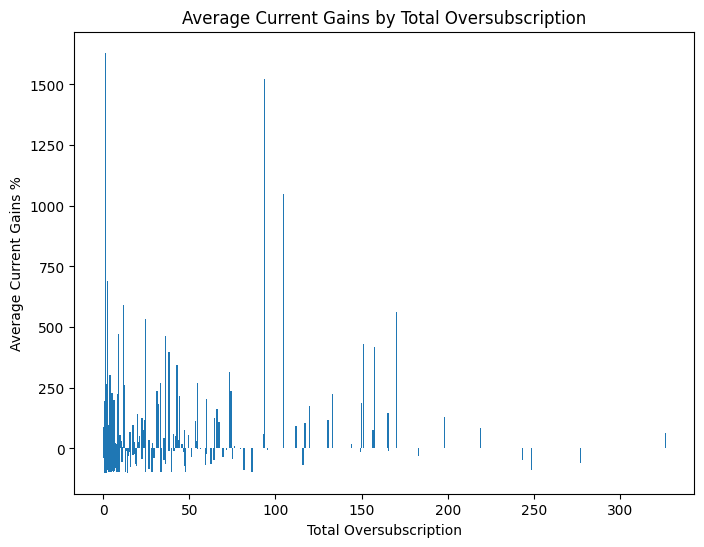

In [61]:
# Group the data by oversubscription categories and calculate the mean of listing gains and current gains
oversubscription_groups = df.groupby('Total')['Listing Gains %', 'Current Gains %'].mean()

# Plot the average listing gains
plt.figure(figsize=(8, 6))
plt.bar(oversubscription_groups.index, oversubscription_groups['Listing Gains %'])
plt.xlabel('Total Oversubscription')
plt.ylabel('Average Listing Gains %')
plt.title('Average Listing Gains by Total Oversubscription')
plt.show()

# Plot the average current gains
plt.figure(figsize=(8, 6))
plt.bar(oversubscription_groups.index, oversubscription_groups['Current Gains %'])
plt.xlabel('Total Oversubscription')
plt.ylabel('Average Current Gains %')
plt.title('Average Current Gains by Total Oversubscription')
plt.show()





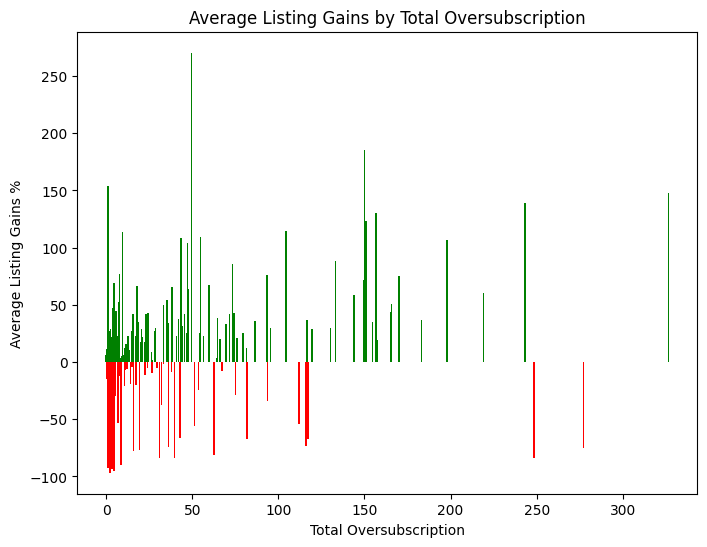

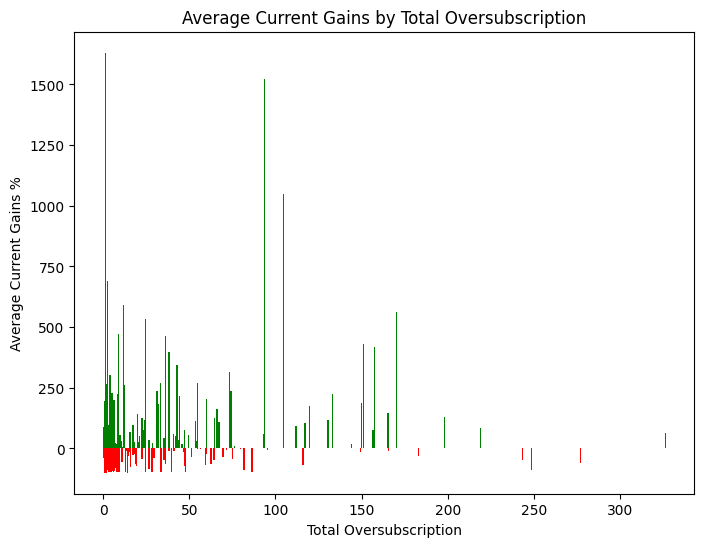

In [62]:
# Define a function to assign color based on gain
def assign_color(gain):
    if gain >= 0:
        return 'green'
    else:
        return 'red'

# Calculate the average listing gains and current gains
oversubscription_groups['Listing Gain Color'] = oversubscription_groups['Listing Gains %'].apply(assign_color)
oversubscription_groups['Current Gain Color'] = oversubscription_groups['Current Gains %'].apply(assign_color)

# Plot the average listing gains with color
plt.figure(figsize=(8, 6))
plt.bar(oversubscription_groups.index, oversubscription_groups['Listing Gains %'], 
        color=oversubscription_groups['Listing Gain Color'])
plt.xlabel('Total Oversubscription')
plt.ylabel('Average Listing Gains %')
plt.title('Average Listing Gains by Total Oversubscription')
plt.show()

# Plot the average current gains with color
plt.figure(figsize=(8, 6))
plt.bar(oversubscription_groups.index, oversubscription_groups['Current Gains %'], 
        color=oversubscription_groups['Current Gain Color'])
plt.xlabel('Total Oversubscription')
plt.ylabel('Average Current Gains %')
plt.title('Average Current Gains by Total Oversubscription')
plt.show()


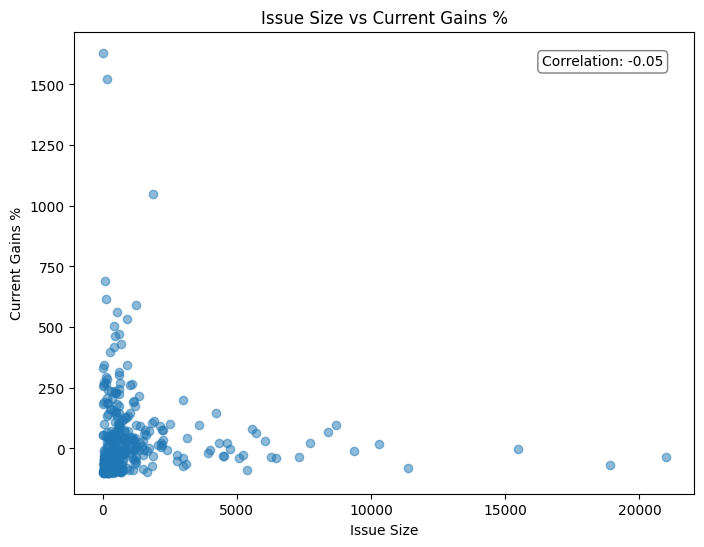

In [63]:
# Calculate the correlation between issue size and current gains
correlation = df['Issue Size'].corr(df['Current Gains %'])

# Plot the scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
plt.scatter(df['Issue Size'], df['Current Gains %'], alpha=0.5)
plt.xlabel('Issue Size')
plt.ylabel('Current Gains %')
plt.title('Issue Size vs Current Gains %')
plt.text(0.95, 0.95, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes, 
         ha='right', va='top', bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round'))
plt.show()


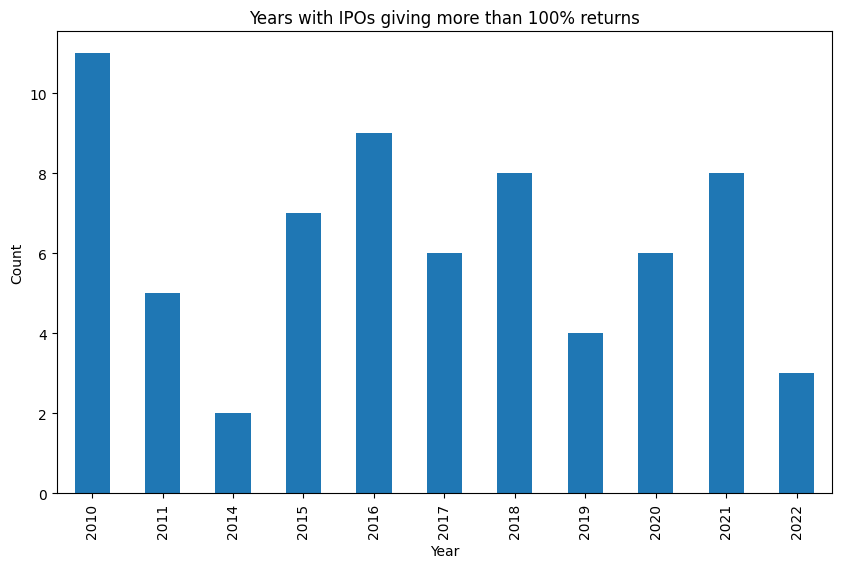

In [64]:
import matplotlib.pyplot as plt

# Filter the IPOs with current gains > 100%
high_return_ipos = df[df['Current Gains %'] > 100]

# Extract the unique years from the 'Date' column
years_with_high_returns = high_return_ipos['Date'].dt.year.value_counts()

# Plot the result
plt.figure(figsize=(10, 6))
years_with_high_returns.sort_index().plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Years with IPOs giving more than 100% returns')
plt.show()


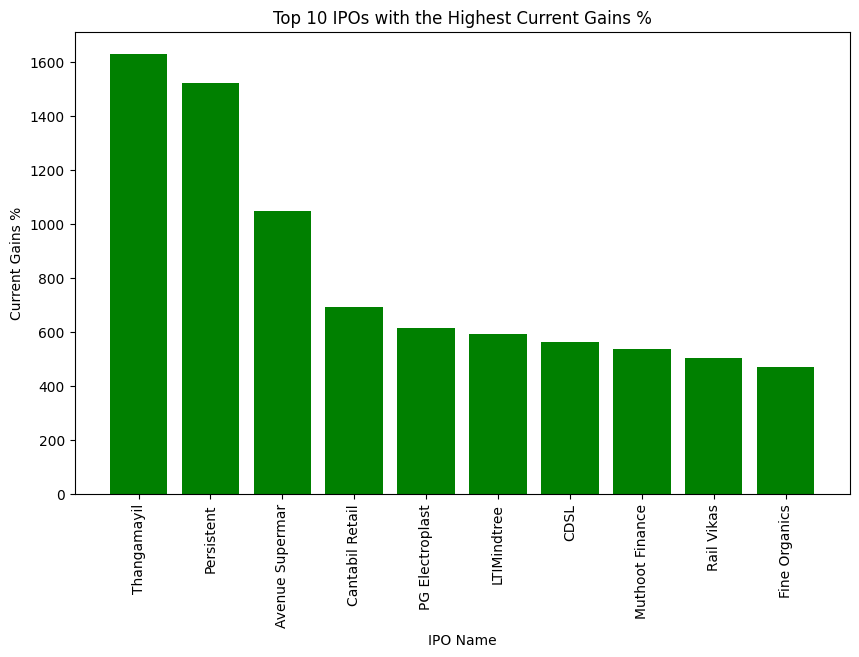

In [65]:
import matplotlib.pyplot as plt

# Sort the DataFrame by performance metric (e.g., current gains %)
sorted_df = df.sort_values('Current Gains %', ascending=False)

# Select the top N IPOs with the highest performance
top_n = 10
top_performing_ipos = sorted_df.head(top_n)

# Create a bar chart to visualize the performance of the top IPOs
plt.figure(figsize=(10, 6))
plt.bar(top_performing_ipos['IPO Name'], top_performing_ipos['Current Gains %'], color='green')
plt.xlabel('IPO Name')
plt.ylabel('Current Gains %')
plt.title(f'Top {top_n} IPOs with the Highest Current Gains %')
plt.xticks(rotation=90)
plt.show()
